## ARC任务-3ee1011a.json

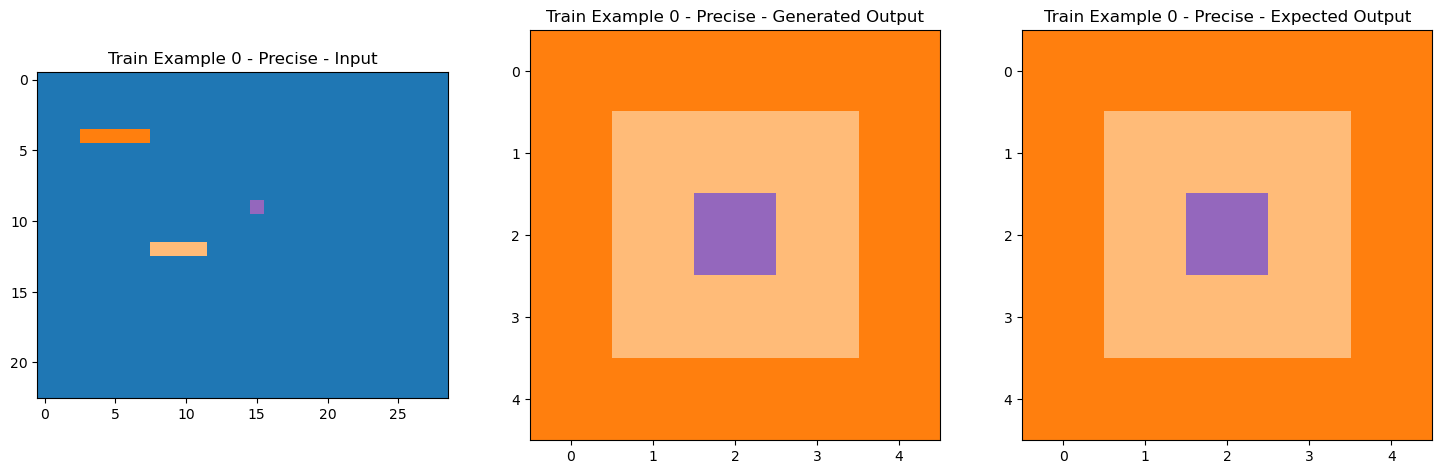

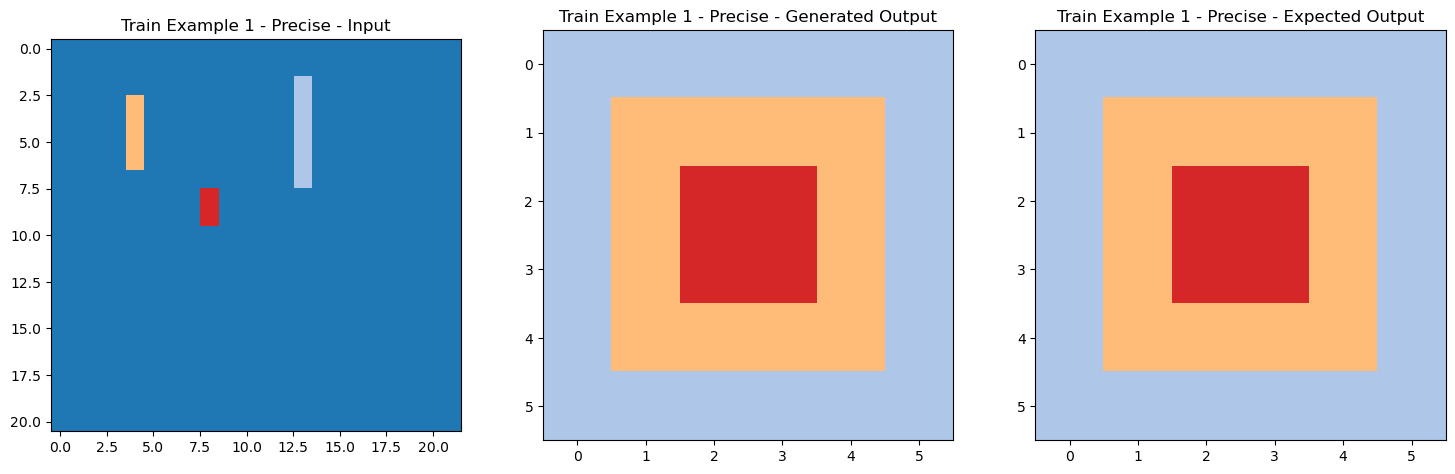

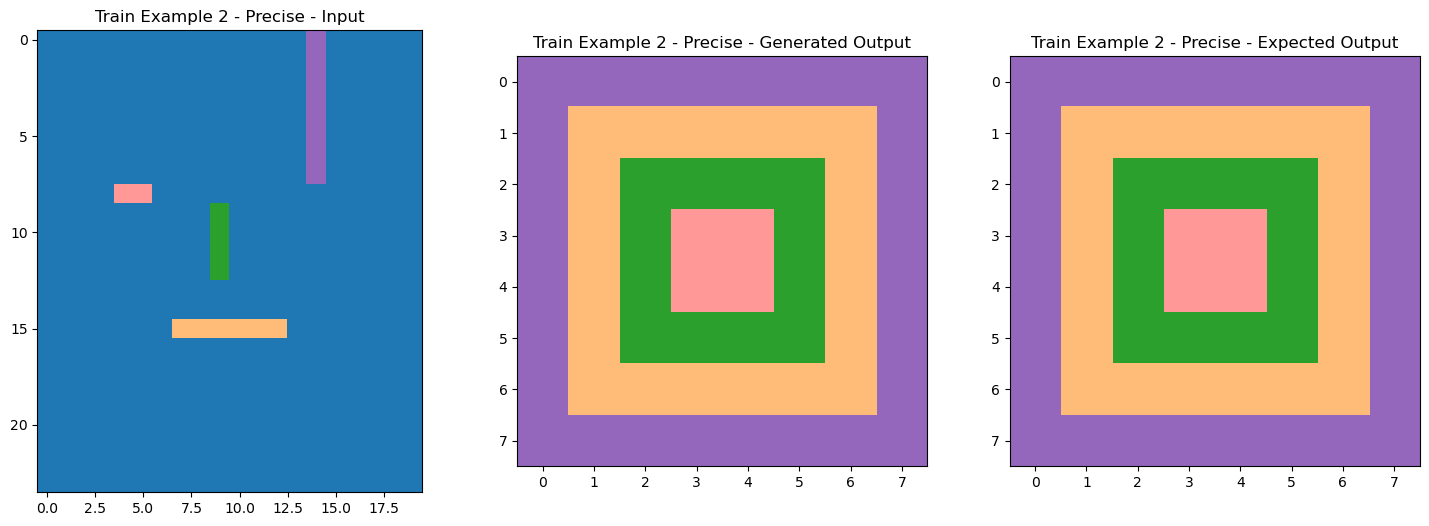

All train examples correct: True


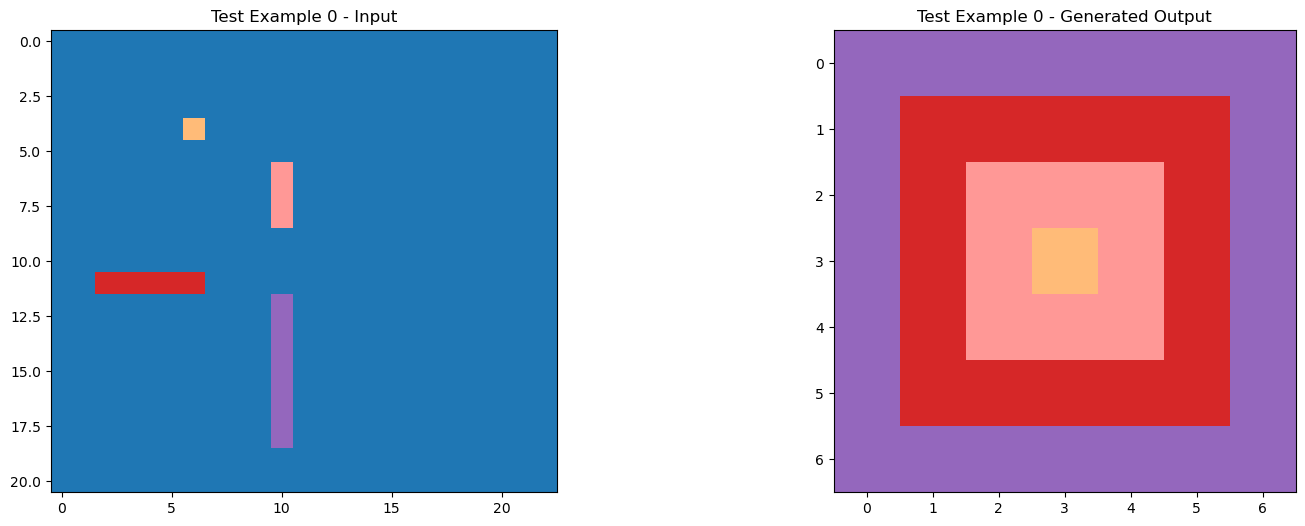

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt

# 1. 数据加载
# 加载任务数据文件
file_path = '3ee1011a.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# 2. 可视化函数
def parse_and_draw(input_grid, output_grid, expected_output=None, title=""):
    """
    输入和输出矩阵的可视化，支持可选的标准输出对比
    """
    fig, axes = plt.subplots(1, 3 if expected_output is not None else 2, figsize=(18, 6))
    axes[0].imshow(input_grid, cmap="tab20", vmin=0, vmax=20)
    axes[0].set_title(f"{title} - Input")
    axes[1].imshow(output_grid, cmap="tab20", vmin=0, vmax=20)
    axes[1].set_title(f"{title} - Generated Output")
    if expected_output is not None:
        axes[2].imshow(expected_output, cmap="tab20", vmin=0, vmax=20)
        axes[2].set_title(f"{title} - Expected Output")
    plt.show()

# 3. 线条提取
def find_lines_detailed(grid):
    """
    从矩阵中提取所有线条（水平和垂直），记录线条颜色和长度
    """
    lines = []
    rows, cols = grid.shape

    # 提取水平线条
    for r in range(rows):
        start, length = None, 0
        for c in range(cols):
            if grid[r][c] != 0:
                if start is None:
                    start = c
                    length = 1
                else:
                    length += 1
            elif start is not None:
                lines.append((grid[r][start], length))
                start, length = None, 0
        if start is not None:
            lines.append((grid[r][start], length))

    # 提取垂直线条
    for c in range(cols):
        start, length = None, 0
        for r in range(rows):
            if grid[r][c] != 0:
                if start is None:
                    start = r
                    length = 1
                else:
                    length += 1
            elif start is not None:
                lines.append((grid[start][c], length))
                start, length = None, 0
        if start is not None:
            lines.append((grid[start][c], length))

    return lines

# 4. 环形嵌套结构生成
def build_ring_structure_precise(lines, target_size):
    """
    根据提取的线条生成环形嵌套矩阵，确保符合目标尺寸
    """
    if not lines:
        return np.zeros(target_size, dtype=int)  # 如果没有线条，返回全零矩阵

    lines.sort(key=lambda x: -x[1])  # 按长度从大到小排序
    n = target_size[0]  # 使用目标矩阵的大小
    grid = np.zeros((n, n), dtype=int)

    # 逐层构建环形结构
    for idx, (color, length) in enumerate(lines):
        start = idx
        end = n - idx - 1
        for i in range(start, end + 1):
            grid[start][i] = color
            grid[end][i] = color
            grid[i][start] = color
            grid[i][end] = color

    return grid

# 5. 验证和测试
results_precise = []
for i, item in enumerate(data["train"]):
    input_grid = np.array(item["input"])
    expected_output = np.array(item["output"])
    target_size = expected_output.shape

    # 提取线条并生成输出
    lines = find_lines_detailed(input_grid)
    generated_output_precise = build_ring_structure_precise(lines, target_size)

    # 保存验证结果
    results_precise.append((i, np.array_equal(generated_output_precise, expected_output), generated_output_precise, expected_output))

    # 可视化比较
    parse_and_draw(input_grid, generated_output_precise, expected_output, f"Train Example {i} - Precise")

# 总结验证结果
all_correct_precise = all(result[1] for result in results_precise)
print(f"All train examples correct: {all_correct_precise}")

# 测试数据处理
for i, item in enumerate(data["test"]):
    input_grid = np.array(item["input"])
    target_size = (7, 7)  # 假设目标尺寸为7x7，可以根据需要动态调整

    # 提取线条并生成输出
    lines = find_lines_detailed(input_grid)
    generated_output_test = build_ring_structure_precise(lines, target_size)

    # 可视化测试数据输出
    parse_and_draw(input_grid, generated_output_test, title=f"Test Example {i}")


## 字母算算术问题

In [6]:
import pandas as pd
import itertools
def solve_alphametics_with_comments(equation):
    """
    解决字母算术问题，并返回字母到数字的映射和替换后的等式。
    
    参数:
    - equation: 字母算术等式的字符串，例如 "BASE + BALL = GAMES"
    
    返回:
    - 如果有解，返回包含字母到数字映射和替换后的等式的字典
    - 如果无解或格式错误，返回对应的错误信息
    """
    try:
        # 分割等式为左边和右边两部分
        left, right = equation.replace(" ", "").split("=")
        # 左边的多项通过 "+" 分割
        words = left.split("+") + [right]
    except ValueError:
        # 如果格式错误，返回提示信息
        return f"无效的等式格式: {equation}"
    
    # 提取等式中所有唯一字母
    letters = set("".join(words))
    if len(letters) > 10:
        # 如果字母数量超过 10，直接返回无法求解的信息
        return "字母数量超过限制（超过10个），无法求解。"

    # 获取每个单词的首字母（这些不能映射为 0）
    first_letters = {word[0] for word in words}

    # 使用 itertools.permutations 生成所有可能的数字排列
    for perm in itertools.permutations(range(10), len(letters)):
        # 构建字母到数字的映射
        letter_to_digit = dict(zip(letters, perm))
        
        # 确保首字母不映射为 0
        if any(letter_to_digit[fl] == 0 for fl in first_letters):
            continue

        # 将单词中的字母替换为对应数字，并转为整数
        def word_to_number(word):
            return int("".join(str(letter_to_digit[ch]) for ch in word))

        # 计算左边的值和右边的值
        left_values = [word_to_number(word) for word in left.split("+")]
        right_value = word_to_number(right)

        # 检查等式是否成立
        if sum(left_values) == right_value:
            # 如果成立，返回结果
            substituted_equation = f"{' + '.join(map(str, left_values))} = {right_value}"
            return {
                "mapping": letter_to_digit,
                "equation": substituted_equation,
            }

    # 如果所有排列都不满足条件，返回无解信息
    return f"未找到 {equation} 的解"


# 测试用例
test_cases = [
    "BASE + BALL = GAMES",  # 有解
    "MOSES + MEETS = SALOME",  # 有解
    "ABCDEFGHIJKLMNOPQRSTUVWXYZ = ZYXWVUTSRQPONMLKJIHGFEDCBA",  # 超过字母限制
    "AAA + BBB = CCC"  # 无解
]

# 格式化测试结果以便展示
formatted_results = []
for test in test_cases:
    result = solve_alphametics_with_comments(test)
    if isinstance(result, dict):
        # 有解时保存映射和替换后的等式
        formatted_results.append({
            "等式": test,
            "字母到数字的映射": result["mapping"],
            "替换后的等式": result["equation"]
        })
    else:
        # 无解时保存错误信息
        formatted_results.append({
            "等式": test,
            "字母到数字的映射": "N/A",
            "替换后的等式": result
        })

# 转为 DataFrame 方便展示
results_df = pd.DataFrame(formatted_results)
results_df

,等式,字母到数字的映射,替换后的等式
0,BASE + BALL = GAMES,"{'A': 4, 'B': 7, 'L': 5, 'G': 1, 'E': 3, 'M': ...",7483 + 7455 = 14938
1,MOSES + MEETS = SALOME,"{'A': 8, 'T': 7, 'O': 3, 'L': 5, 'E': 2, 'M': ...",93121 + 92271 = 185392
2,ABCDEFGHIJKLMNOPQRSTUVWXYZ = ZYXWVUTSRQPONMLKJ...,N/A,字母数量超过限制（超过10个），无法求解。
3,AAA + BBB = CCC,"{'A': 1, 'B': 2, 'C': 3}",111 + 222 = 333


In [7]:
# Test cases
test_cases = [
    'FIFTY + STATES = AMERICA',
'SQUARE +  DANCE = DANCER',
'ELF + ELF = FOOL',
'CROSS + ROADS = DANGER',
'GREEN + ORANGE = COLORS'
]
# 格式化测试结果以便展示
formatted_results = []
for test in test_cases:
    result = solve_alphametics_with_comments(test)
    if isinstance(result, dict):
        # 有解时保存映射和替换后的等式
        formatted_results.append({
            "等式": test,
            "字母到数字的映射": result["mapping"],
            "替换后的等式": result["equation"]
        })
    else:
        # 无解时保存错误信息
        formatted_results.append({
            "等式": test,
            "字母到数字的映射": "N/A",
            "替换后的等式": result
        })

# 转为 DataFrame 方便展示
results_df = pd.DataFrame(formatted_results)
results_df

,等式,字母到数字的映射,替换后的等式
0,FIFTY + STATES = AMERICA,"{'F': 6, 'A': 1, 'T': 8, 'I': 5, 'R': 7, 'Y': ...",65682 + 981849 = 1047531
1,SQUARE + DANCE = DANCER,"{'A': 1, 'D': 9, 'Q': 2, 'N': 5, 'R': 6, 'U': ...",824163 + 91573 = 915736
2,ELF + ELF = FOOL,"{'F': 1, 'O': 4, 'E': 7, 'L': 2}",721 + 721 = 1442
3,CROSS + ROADS = DANGER,"{'A': 5, 'D': 1, 'N': 8, 'O': 2, 'R': 6, 'G': ...",96233 + 62513 = 158746
4,GREEN + ORANGE = COLORS,"{'A': 5, 'N': 6, 'O': 1, 'R': 3, 'L': 9, 'G': ...",83446 + 135684 = 219130
